# Table of content
<ul>
Data Wrangling
<li><a href="#preprocessing">Preprocessing Text</a></li>
Data Viz
<li><a href="#word_freq">Word Frequency</a></li> 
   <li><a href="#freqword">Word Occurence Time Series 2011 to 2021</a></li>
       <li><a href="#freqword_21">Word Occurence Time Series 2020 to 2021</a></li>
<li><a href="#topic">Topic Modelling</a></li> 
    <li><a href="#coherent_model">Topic Modelling Coherent </a></li>
  <li><a href="#cluster_topic">Topic Clustering of documents</a></li>
<li><a href="#similar_topic">Similarity Topic Finder</a></li>

<li><a href="#dominant_topic">Dominant Topic in documents</a></li>

<li><a href="#ner"> Named Entity Recognition</a></li>
</ul>

In [1]:
# pip install pandas matplotlib bs4 wordcloud seaborn spacy nltlk install gensim pyLDAvis numpy re string 

In [2]:
import pandas as pd
import numpy as np
import re
import string
import unicodedata

"""data visualization"""

import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import seaborn as sns
from matplotlib import rc

"""to supress warning"""

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

"""text cleaning"""

from bs4 import BeautifulSoup

"""stopwords, tokenizer, stemmer"""



import spacy
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

#nltk.download('punkt')
#nltk.download('wordnet')

"""additional processing"""

import gensim
import gensim.corpora as corpora
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
from gensim.corpora import Dictionary 
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess 

from collections import Counter

"""ML modelling"""

# Enable logging for gensim - optional
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

#conda install -c conda-forge pyldavis
from sklearn.decomposition import LatentDirichletAllocation

#pip install flair

import pyLDAvis

from matplotlib import gridspec
import math
#pip install pyLDAvis.sklearn
import pyLDAvis.sklearn

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger')

/home/criuser/miniconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/home/criuser/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# I - Read Data 

In [4]:
global_df = pd.read_csv('global_df.csv')

global_df.head(5)

id  user_id                        created_at  \
0  6997.0      884  2016-03-14 17:40:17.744000+00:00   
1  3798.0      884         2014-02-24 22:58:11+00:00   
2  8586.0      884  2016-11-05 13:46:33.686000+00:00   
3  7124.0      884  2016-04-14 13:50:17.159000+00:00   
4  8707.0      884  2016-11-15 18:36:40.786000+00:00   

                                              cooked  post_number  \
0  <p>The size of the mask plus electronics is ra...          3.0   
1  <aside class="quote no-group quote-modified" d...          4.0   
2  <p>The <a href="https://biostrap.com">Biostrap...         15.0   
3  <p>I’ve <a href="http://www.quantifiedbob.com/...          1.0   
4  <p>Personally, I want to be able to access tim...          6.0   

                         updated_at  reply_count  reply_to_post_number  \
0  2016-03-14 17:40:42.276000+00:00          1.0                   2.0   
1  2015-10-21 04:24:48.934000+00:00          0.0                   NaN   
2  2016-11-05 13:47:19.301000+00:00          1.0                   NaN   
3  2016-04-14 13:50:17.159000+00:00          0.0                   NaN   
4  2016-11-15 18:36:40.786000+00:00          1.0                   NaN   

   quote_count  incoming_link_count  ...  \
0          0.0                 10.0  ...   
1          1.0                  0.0  ...   
2          0.0                 20.0  ...   
3          0.0                878.0  ...   
4          0.0                  4.0  ...   

                                        cleaned_text  \
0  mask plus electronics bulky foam material unde...   
1  agaricus restedness point scale knowing middle...   
2  biostrap looks promising shipping december cla...   
3  posted lengthy writeup recent experience repli...   
4  personally able access series data breath temp...   

                                         lemmat_text  \
0  mask plus electronics bulky foam material unde...   
1  agaricus restedness point scale middle cover l...   
2  biostrap promise ship december claim offer hr ...   
3  post lengthy writeup recent experience replica...   
4  personally able access series data breath temp...   

                                          token_text  \
0  ['mask', 'plus', 'electronics', 'bulky', 'foam...   
1  ['agaricus', 'restedness', 'point', 'scale', '...   
2  ['biostrap', 'promise', 'ship', 'december', 'c...   
3  ['post', 'lengthy', 'writeup', 'recent', 'expe...   
4  ['personally', 'able', 'access', 'series', 'da...   

                                          no_sw_text  \
0  mask plus electronics bulky foam material unde...   
1  agaricus restedness point scale middle cover l...   
2  biostrap promise ship december claim offer hr ...   
3  post lengthy writeup recent experience replica...   
4  personally able access series data breath temp...   

                                         noHTML_text  \
0   The size of the mask plus electronics is rath...   
1   \n \n  \n  Agaricus: \n \n For “restedness” I...   
2   The  Biostrap  looks promising (and is shippi...   
3   I’ve  posted a lengthy writeup of my recent e...   
4   Personally, I want to be able to access time ...   

                                      lemma_LDA_text  \
0  mask electronics material mask sweat issue str...   
1  agaricus restedness point scale cover range fo...   
2  biostrap claim offer hr ppg sensor hrv rest re...   
3  experience diet study cell metabolism institut...   
4  access series data breath tempo second second ...   

                                      no_sw_LDA_text  \
0  mask electronics material mask sweat issue str...   
1  agaricus restedness point scale cover range fo...   
2  biostrap claim offer hr ppg sensor hrv rest re...   
3  experience diet study cell metabolism institut...   
4  access series data breath tempo second second ...   

                                       token_NN_text  creation_date  \
0  ['mask', 'electronics', 'material', 'mask', 's...     2016-03-14   
1  ['agaricus', 'restedness', 'point', 'scal

In [5]:
global_df.groupby(['topic_id', 'id']).first()

user_id                        created_at  \
topic_id id                                                   
19.0     30.0          -1  2015-03-15 05:04:38.158000+00:00   
52.0     63.0           7         2011-06-29 00:23:23+00:00   
         65.0           9         2011-06-29 08:54:53+00:00   
         66.0          10         2011-06-29 16:20:56+00:00   
         74.0           8         2011-06-30 11:33:03+00:00   
...                   ...                               ...   
9169.0   21331.0     9638  2021-04-01 20:28:16.543000+00:00   
         21332.0     9638  2021-04-01 20:43:43.795000+00:00   
         21334.0     8316  2021-04-02 02:16:21.660000+00:00   
         21351.0     9638  2021-04-05 14:21:08.605000+00:00   
9191.0   21354.0     8854  2021-04-06 08:40:15.993000+00:00   

                                                             cooked  \
topic_id id                                                           
19.0     30.0     <p>[Replace this first paragraph with a short ...   
52.0     63.0     <p>Yay, first post <img src="https://forum.qua...   
         65.0     <p>Great topic, Mike!</p>\n<p>Here are some mo...   
         66.0     <p>Thanks Mike for starting this thread! I tho...   
         74.0     <aside class="quote no-group quote-modified" d...   
...                                                             ...   
9169.0   21331.0  <aside class="quote no-group" data-username="r...   
         21332.0  <aside class="quote no-group" data-username="d...   
         21334.0  <aside class="quote no-group" data-username="d...   
         21351.0  <aside class="quote no-group" data-username="r...   
9191.0   21354.0  <p>Hello everyone,</p>\n<p>I’m a newbie quanti...   

                  post_number                        updated_at  reply_count  \
topic_id id                                                                    
19.0     30.0             1.0  2015-03-15 05:04:38.158000+00:00          0.0   
52.0     63.0             1.0  2015-10-02 07:08:07.436000+00:00          0.0   
         65.0             2.0  2015-10-02 07:08:09.083000+00:00          0.0   
         66.0             3.0  2015-03-15 05:04:43.854000+00:00          1.0   
         74.0             4.0  2015-10-03 00:27:53.789000+00:00          0.0   
...                       ...                               ...          ...   
9169.0   21331.0          8.0  2021-04-01 20:28:16.543000+00:00          1.0   
         21332.0          9.0  2021-04-01 20:43:43.795000+00:00          0.0   
         21334.0         10.0  2021-04-02 02:16:21.660000+00:00          1.0   
         21351.0         11.0  2021-04-05 14:21:08.605000+00:00          0.0   
9191.0   21354.0          1.0  2021-04-06 08:40:15.993000+00:00          0.0   

                  reply_to_post_number  quote_count  incoming_link_count  \
topic_id id                                                                
19.0     30.0                      NaN          0.0                 15.0   
52.0     63.0                      NaN          0.0                  6.0   
         65.0                      NaN          0.0                  1.0   
         66.0                      NaN          0.0                  1.0   
         74.0                      NaN          1.0                  1.0   
...                                ...          ...                  ...   
9169.0   21331.0                   NaN          1.0                  0.0   
         21332.0                   7.0          1.0                  0.0   
         21334.0                   8.0          1.0                  0.0   
         21351.0                  10.0          1.0                  0.0   
9191.0   21354.0                   NaN          0.0                 10.0   

                  reads  ...  \
topic_id id              ...   
19.0     30.0      39.0  ...   
52.0     63.0      12.0  ...   
         65.0      12.0  ...   
         66.0      12.0  ...   
         74.0      11.0  ...   
...                 

In [6]:
global_df.shape

(10282, 49)

In [7]:
global_df = global_df.iloc[global_df.astype(str).drop_duplicates().index]

In [8]:
global_df.shape

(10282, 49)

In [9]:
# getting rows with topic/post content

global_df = global_df[global_df.cooked != '0']
global_df.shape

(10282, 49)

# II - Exploratory Data Analysis

<a id='preprocessing'></a>

## 1 - Preprocessing Topic/Post Text 
* Data Wrangling
* Text cleaning
* Text normalization (Lemmatization)
* Text Tokenization / Remove stop words

In [10]:
global_df['created_at'] = pd.to_datetime(global_df['created_at'], format='%Y-%m-%d %H:%M:%S.%f') 
global_df['created_at']

0       2016-03-14 17:40:17.744000+00:00
1              2014-02-24 22:58:11+00:00
2       2016-11-05 13:46:33.686000+00:00
3       2016-04-14 13:50:17.159000+00:00
4       2016-11-15 18:36:40.786000+00:00
                      ...               
10277          2014-11-23 21:23:59+00:00
10278   2016-12-07 21:48:44.895000+00:00
10279   2016-10-18 13:25:35.363000+00:00
10280          2014-04-02 20:44:11+00:00
10281          2011-11-01 17:09:55+00:00
Name: created_at, Length: 10282, dtype: datetime64[ns, UTC]

In [11]:
global_df['creation_date'] = global_df['created_at'].dt.strftime("%Y-%m-%d")

In [12]:
global_df['creation_year'] = global_df['created_at'].dt.year

### Clean Text

In [13]:
# Remove html code <p>
def remove_html(text):
    pattern = re.compile('<[^<]+?>')
    text = re.sub(pattern, ' ', text)
    return text

In [14]:
global_df['noHTML_text'] = global_df.cooked.apply(lambda x: remove_html(x))

In [15]:
global_df.to_csv('global_df.csv', header = True, encoding='utf-8', index=False)

In [16]:
# Function to clean text

def clean_text(text):
    
    # Remove html code <p>
    pattern = re.compile('<[^<]+?>')
    text = re.sub(pattern, ' ', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/\S+','',text)
    
    # lowercase
    text =text.lower()
    

    # Remove ticks, apostrophes and letters after " 's "
    text = re.sub("\’\w+", '', text)
    text = re.sub("\'\w+", '', text)
    
    
    # Remove all types of nums
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text)
    text = re.sub(r"\b\d+\b", ' ', text)
    
    # Remove specific punctuations
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    
    # Remove accents "é"
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # remove the hashtag symbol #
    text = re.sub(r'#','',text)
   # text = re.sub(r'[-./]', ' ', text)
    
    return text

In [17]:
global_df['cleaned_text'] = global_df.cooked.apply(lambda x: clean_text(x))

# Compare between Original Text & Clean Text

pd.options.display.max_colwidth = 300
global_df[['cooked', 'cleaned_text']].head(1)

cooked  \
0  <p>The size of the mask plus electronics is rather bulky and the foam material on the underside of the mask sometimes makes my forehead sweat so I’m guessing the slippage issue/waking me up is being caused by this.</p>\n<p>The mask has an elastic strap, but unfortunately it’s non-adjustable. I’m...   

                                                                                                                                                                                                                                                                                                  cleaned_text  
0   the size of the mask plus electronics is rather bulky and the foam material on the underside of the mask sometimes makes my forehead sweat so i guessing the slippage issue waking me up is being caused by this the mask has an elastic strap but unfortunately it non adjustable i thinking about cut...

### Clean StopWords

In [18]:
# to avoid OS error run following command
# !python3 -m spacy download en_core_web_sm

In [19]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [20]:
# Holistic stop words function

nlp = spacy.load('en_core_web_sm')

set1 = list(nlp.Defaults.stop_words)
set2 = list(STOPWORDS)
set3 = list(stopwords.words('english'))

extra_set = ['ill', 'hi', 'im', 'ive', 'dont', 'hello', 'hey', 'like', 'thanks', 'maybe', 'q', 'e g', 'think', 'good', 'com', 'hop',
             'thats', 'c', 'b', 'l', 'il', 'x', 'z', 'v', 'f', 'e', 'q', 'isnt', 'wont', 'yes', 'want', 'let', 'know', 'id', 'g', 'thing',
             'thank', 'come', 'mm', 'w', 'non', 'day', 'look', 'baby', 'n', 'lot', 'way', 'use', 'try', 'hour', 'couple', 'week', 'ago',
             'i', 'h', 'et', 'img', 'cool', 'year', 'u', 'need', 'nice', 'guy', 'boy', 'pm', '3rd', 'pretty', 'sure', 'bit', 'week', 'minute',
             'png', 'screen', 'shot', 'sans', 'serif', 'mon', 'mar', 'kb', 'gmt', 'arial', 'helvetica', 'feb', 'long', 'period', 'time', 'font', 
             'size', 'medium', 'interested', 'dat', 'drank', 'dad', 'bottle', 'turn', 'number', 'everyday', 'follow', 'life', 'jar', 'j','www',
             'happen', 'yeah', 'wish', 'love', 'cheer', 'fun', 'later', 'bad', 'unfortunately', 'org', 'july', 'ki', 'february', 'month', 'saw',
             'potentially', '21st', 'hf', 'rr', 'lf', 'wait', 'yay', 'especially', 'feel', 'go', '100s', 'bin']

stop_words_list = set1 + set2 + set3 + extra_set


# remove stopwords
def remove_stopwords(text): 
    slist = [word for word in text.split() if word not in stop_words_list]
    text = (" ").join(slist)
    return text

In [21]:
global_df['cleaned_text'] = global_df.cleaned_text.apply(lambda x: remove_stopwords(x))

In [22]:
global_df[['cooked', 'cleaned_text']].head(1)

cooked  \
0  <p>The size of the mask plus electronics is rather bulky and the foam material on the underside of the mask sometimes makes my forehead sweat so I’m guessing the slippage issue/waking me up is being caused by this.</p>\n<p>The mask has an elastic strap, but unfortunately it’s non-adjustable. I’m...   

                                                                                                                                                                                cleaned_text  
0  mask plus electronics bulky foam material underside mask makes forehead sweat guessing slippage issue waking caused mask elastic strap adjustable thinking cutting reattaching stays snug

###    Lemmatize Words  

In [23]:
# Function To Lemmatize Words To Its Root Form

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
        
# Lemmatization function
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [24]:
# to avoid errors with nltk library download the following 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [25]:
global_df['lemmat_text'] = global_df.cleaned_text.apply(lambda x: lemmatize_sentence(x))

In [26]:
global_df['lemmat_text'] = global_df.lemmat_text.apply(lambda x: remove_stopwords(x))

In [27]:
global_df[['cleaned_text', 'lemmat_text']].head(1)

cleaned_text  \
0  mask plus electronics bulky foam material underside mask makes forehead sweat guessing slippage issue waking caused mask elastic strap adjustable thinking cutting reattaching stays snug   

                                                                                                                                                       lemmat_text  
0  mask plus electronics bulky foam material underside mask forehead sweat guess slippage issue wake cause mask elastic strap adjustable cut reattaching stay snug

### Create Lemmetized text POS Noun for LDA Model

In [28]:
# Function To Lemmatize Words To Its Root Form and keep only NOUN 'NN' POS tag

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_n_tag(nltk_tag):
    if nltk_tag.startswith('N'):
        return wordnet.NOUN 
    else:          
        return None
        
# Lemmatization function
def lemma_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_n_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            pass
        
        else: 
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            
    return " ".join(lemmatized_sentence)

In [29]:
global_df['lemma_LDA_text'] = global_df.cleaned_text.apply(lambda x: lemma_sentence(x))

In [30]:
global_df['lemma_LDA_text'] = global_df.lemma_LDA_text.apply(lambda x: remove_stopwords(x))

In [31]:
global_df[['cleaned_text', 'lemma_LDA_text']].head(1)

cleaned_text  \
0  mask plus electronics bulky foam material underside mask makes forehead sweat guessing slippage issue waking caused mask elastic strap adjustable thinking cutting reattaching stays snug   

                                               lemma_LDA_text  
0  mask electronics material mask sweat issue strap stay snug

### Tokenize words 

In [32]:
# Tokenize Text 
def tokenize_text(text):
    filtered_text = []
    words = word_tokenize(text) 

    for word in words:
        filtered_text.append(word)
                
    return filtered_text

In [33]:
# tokenize all POS text
global_df['token_text'] = global_df.lemmat_text.apply(lambda x: tokenize_text(x))
# tokenize NOUN only POS text
global_df['token_NN_text'] = global_df.lemma_LDA_text.apply(lambda x: tokenize_text(x))

In [34]:
global_df[['token_text', 'token_NN_text']].head(1)

token_text  \
0  [mask, plus, electronics, bulky, foam, material, underside, mask, forehead, sweat, guess, slippage, issue, wake, cause, mask, elastic, strap, adjustable, cut, reattaching, stay, snug]   

                                                          token_NN_text  
0  [mask, electronics, material, mask, sweat, issue, strap, stay, snug]

In [35]:
global_df.to_csv('global_df.csv', header = True, encoding='utf-8', index=False)

### 1-1 Explore dataset

In [36]:
global_df['number_of_words'] = global_df.noHTML_text.apply(lambda x: len(x.split()))

## docs


In [37]:
global_df['date_time'] = global_df['creation_date']
global_df['date_year'] = global_df['creation_year']

In [38]:
global_df['date_month'] = global_df['created_at'].dt.strftime('%Y-%m')

In [39]:
# Creating the distribution dataframe by month
dist_month = global_df['date_month'].value_counts(ascending=True)
dist_month = dist_month.sort_index()

In [40]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


/home/criuser/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


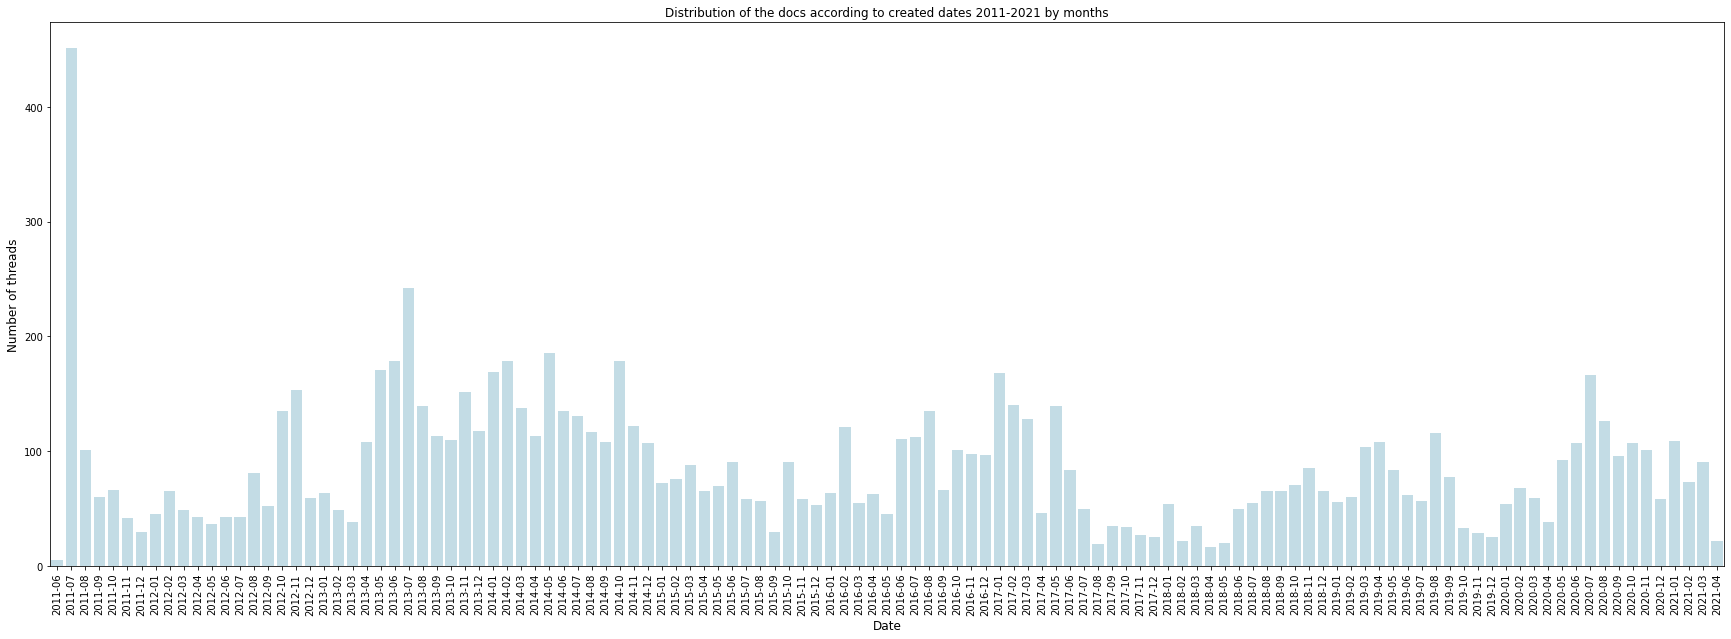

In [41]:
# Plot the distribution
plt.figure(figsize=(30,10))
g = sns.barplot(dist_month.index, dist_month.values, alpha=0.8, color='lightblue')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of threads', fontsize=12)
plt.title("Distribution of the docs according to created dates 2011-2021 by months")
plt.show()

### Topics distribution

In [42]:
df_topic = global_df.groupby(['topic_id']).first()

In [43]:
# Creating the distribution dataframe by month
dist_year = global_df['creation_year'].value_counts(ascending=True)
dist_year = dist_year.sort_index()

/home/criuser/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


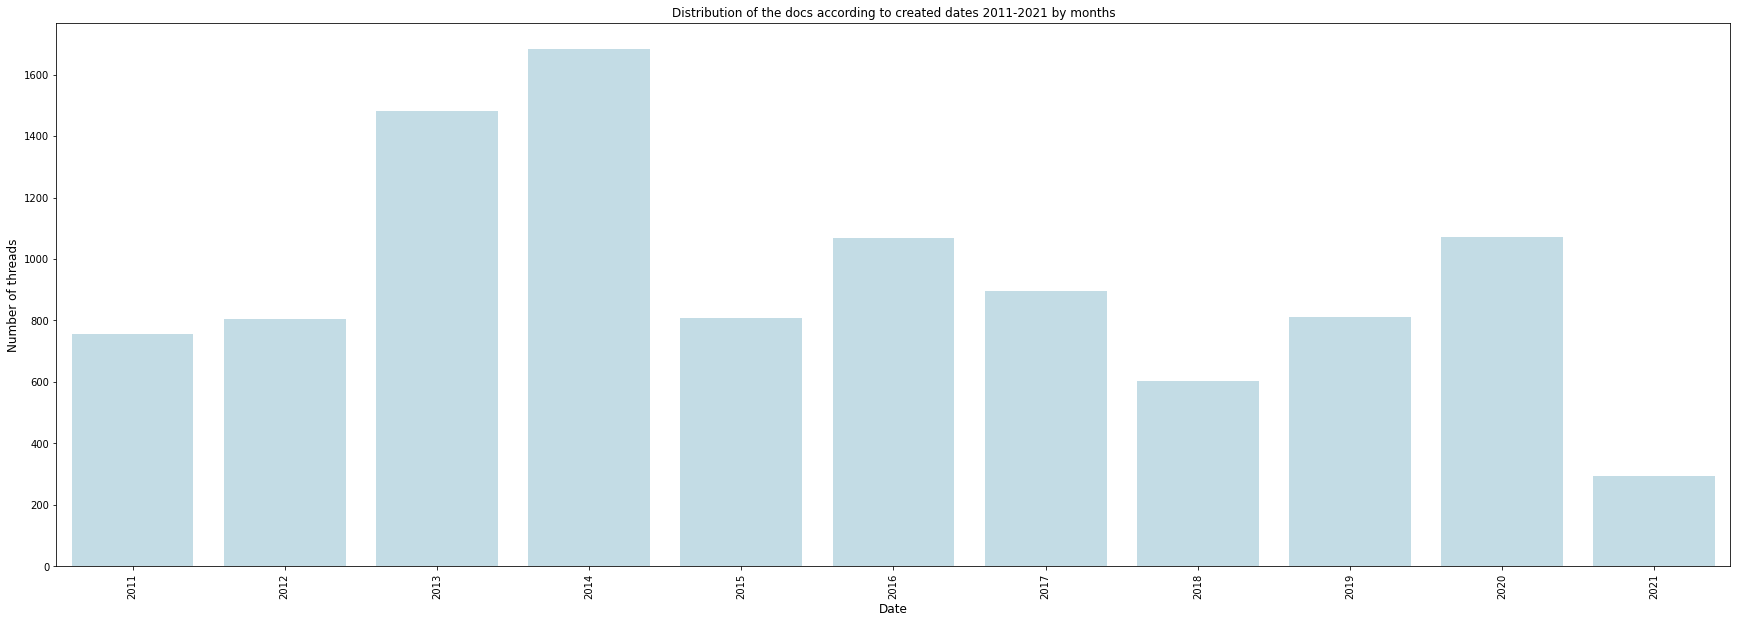

In [44]:
# Plot the distribution
plt.figure(figsize=(30,10))
sns.barplot(dist_year.index, dist_year.values, alpha=0.8, color='lightblue')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of threads', fontsize=12)
plt.title("Distribution of the docs according to created dates 2011-2021 by months")
plt.show()

### Average characters in words in a sentence

/home/criuser/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/criuser/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:>

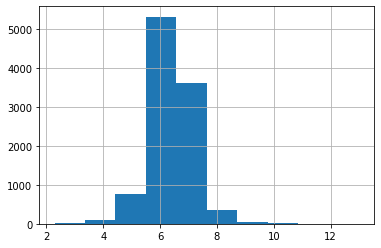

In [45]:
global_df['cleaned_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

### Entity Frequencies

In [46]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [47]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=global_df['cleaned_text'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

### Visualize entity frequencies:

<AxesSubplot:>

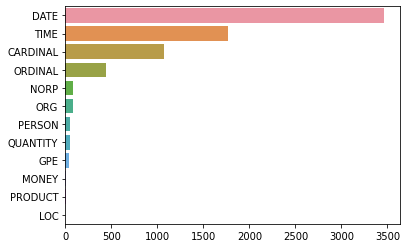

In [48]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

### Visualize the most common tokens per entity

In [49]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [50]:
nlp.max_length = 3490259 

In [51]:
tokens = nlp(''.join(str(global_df['cleaned_text'].tolist())))

In [52]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('daily', 578),
 ('years', 450),
 ('minutes', 331),
 ('hours', 299),
 ('today', 280),
 ('second', 277),
 ('days', 264),
 ('night', 262),
 ('months', 255),
 ('weeks', 200),
 ('morning', 165),
 ('weekly', 111),
 ('half', 98),
 ('seconds', 91),
 ('zero', 87),
 ('yesterday', 77),
 ('evening', 75),
 ('monthly', 63),
 ('summer', 43),
 ('23andme', 41)]

#### *ORGANIZATION entity

/home/criuser/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

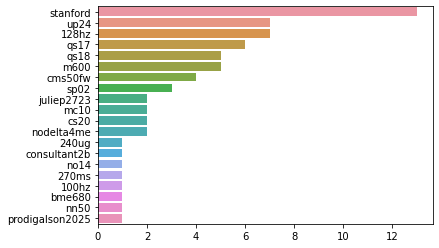

In [53]:
def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=global_df['lemmat_text'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(20)))
sns.barplot(y,x)

In [54]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

#### * entity

/home/criuser/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

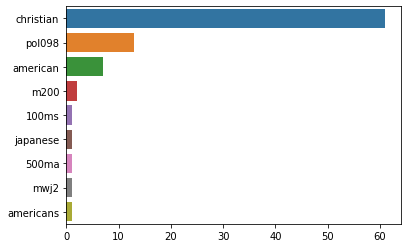

In [55]:
def ner(text,ent="NORP"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=global_df['cleaned_text'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

#### * Geographical entity 

/home/criuser/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

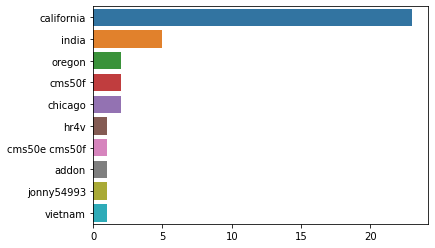

In [56]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=global_df['lemmat_text'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

#### Quantity entity

/home/criuser/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

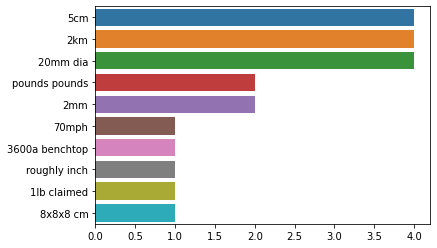

In [57]:
def ner(text,ent="QUANTITY"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=global_df['cleaned_text'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

#### Most common names that appeared in the forums

/home/criuser/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

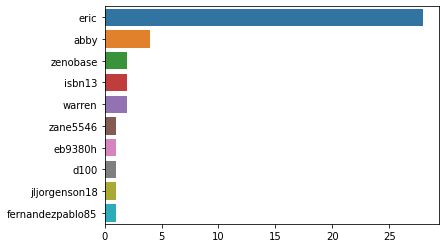

In [58]:
per=global_df['lemmat_text'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech: 

    Noun (NN)-  Verb (VB)-  Adjective(JJ)- Adverb(RB)- Preposition (IN)-
    Conjunction (CC)- Pronoun(PRP)-  Interjection (INT)



In [59]:
# Code Snippet for Parts of Speach Barchart

import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)

In [60]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

In [61]:
global_df['token'] = global_df.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)
global_df['pos_tags'] = global_df.apply(lambda row: nltk.pos_tag(row['token']), axis=1)

tag_count_df = pd.DataFrame(global_df['pos_tags'].map(lambda x: Counter(tag[1] for tag in x)).to_list())

df_pos = pd.concat([global_df, tag_count_df], axis=1).fillna(0).drop(['pos_tags', 'token'], axis=1)

In [62]:
len(df_pos.columns)

87

In [63]:
df = pd.DataFrame(df_pos[['NN', 'VBG', 'NNS', 'VBP', 'JJ', 'VBZ', 'RB', 'VBD', 'VBN', 'VBZ']].sum())
df = df.reset_index()
df.columns =['pos', 'count']

In [64]:
df.columns =['pos', 'count']
df = df.sort_values(by='count', ascending=False)

In [65]:
import plotly.express as px

fig = px.bar(df, x = 'pos', y = 'count', title="Part-of-speech tagging")

fig.update_layout(xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5, 6,7,8],
        ticktext = ['Noun', 'Adjective', 'Noun PLural', 'V Present', 'V non-3rd person present', 'Adverb', 'V Past Tense', 'V Past participle', 'V 3rd P Present']))

fig.show()

<a id='word_freq'></a>
## 2 - Word frequency analysis

### Word Frequency Data Viz

In [66]:
mylist = []
for string in global_df['lemmat_text']:
    mylist.append(string)
mylist

new_text = str(mylist)
#tokenization
txt_tokens = word_tokenize(new_text)
words=[word.lower() for word in txt_tokens if word.isalpha()]

In [67]:
# Frequency Distribution Plot
fdist = FreqDist(words)
df_fdist = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

#top 30 words 
df_fdist30 = df_fdist.sort_values(['frequency'], ascending=False).head(30)

Text(0.5, 1.0, 'TOP 30 frequent words which occurred in the posts/topics from 2011 to 2021')

<Figure size 1440x720 with 0 Axes>

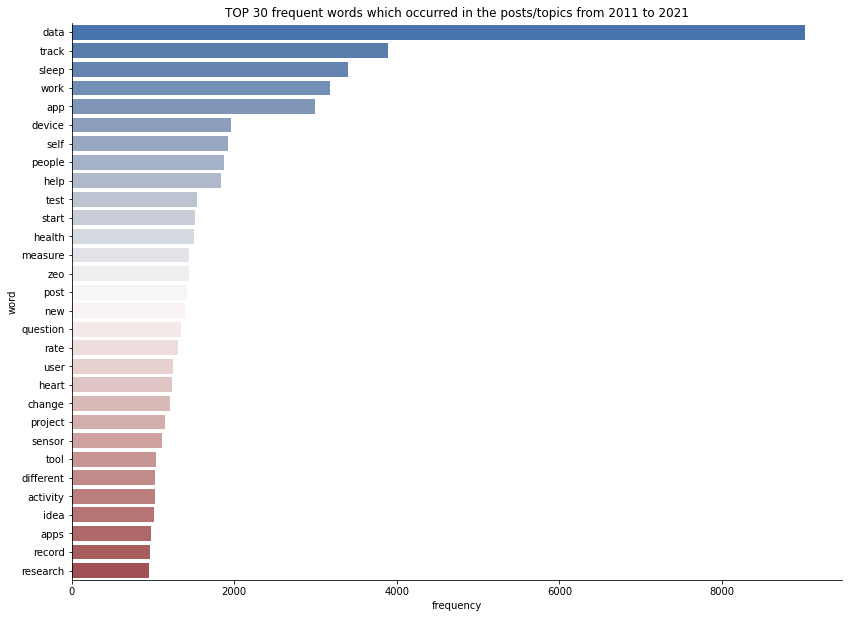

In [68]:
#ploting top 20 words 
plt.figure(figsize=(20,10))
sns.catplot(y="word", x="frequency", kind="bar", palette="vlag", data=df_fdist30, height=8.27, aspect=11.7/8.27)
plt.title('TOP 30 frequent words which occurred in the posts/topics from 2011 to 2021')

# Word Occurence in Dataset of 2021

In [69]:
df_2021 = global_df[(global_df['creation_year'] == 2021) ]

In [70]:
mylist = []
for string in df_2021['lemmat_text']:
    mylist.append(string)
mylist

new_text = str(mylist)
#tokenization
txt_tokens = word_tokenize(new_text)
words_21 = [word.lower() for word in txt_tokens if word.isalpha()]

In [71]:
# Frequency Distribution Plot
fdist = FreqDist(words_21)
df_fdist = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

#top 30 words 
df_fdist30 = df_fdist.sort_values(['frequency'], ascending=False).head(30)

In [72]:
# calculating the most frequent words' occurence in each thread 

df_2021['data'] =  df_2021['lemmat_text'].str.count('data')
df_2021['track'] = df_2021['lemmat_text'].str.count('track')
df_2021['work'] =  df_2021['lemmat_text'].str.count('work')
df_2021['sleep'] = df_2021['lemmat_text'].str.count('sleep')
df_2021['self'] =  df_2021['lemmat_text'].str.count('self')
df_2021['app'] =  df_2021['lemmat_text'].str.count('app')
df_2021['measure'] = df_2021['lemmat_text'].str.count('measure')
df_2021['metric'] =  df_2021['lemmat_text'].str.count('metric')
df_2021['start'] =   df_2021['lemmat_text'].str.count('start')
df_2021['question'] = df_2021['lemmat_text'].str.count('question')
df_2021['export'] =   df_2021['lemmat_text'].str.count('export')
df_2021['help'] =     df_2021['lemmat_text'].str.count('help')
df_2021['efn'] =      df_2021['lemmat_text'].str.count('efn')
df_2021['amp'] =      df_2021['lemmat_text'].str.count('amp')
df_2021['heart'] =    df_2021['lemmat_text'].str.count('heart')
df_2021['rate'] =     df_2021['lemmat_text'].str.count('rate')
df_2021['health'] =   df_2021['lemmat_text'].str.count('health')
df_2021['device'] =   df_2021['lemmat_text'].str.count('device')
df_2021['emfit'] =    df_2021['lemmat_text'].str.count('emfit')
df_2021['experiment'] = df_2021['lemmat_text'].str.count('experiment')
df_2021['example'] =    df_2021['lemmat_text'].str.count('example')
df_2021['device'] = df_2021['lemmat_text'].str.count('device')
df_2021['people'] = df_2021['lemmat_text'].str.count('people')
df_2021['note'] = df_2021['lemmat_text'].str.count('note')
df_2021['analysis'] = df_2021['lemmat_text'].str.count('analysis')
df_2021['food'] = df_2021['lemmat_text'].str.count('food')
df_2021['learn'] = df_2021['lemmat_text'].str.count('learn')
df_2021['dandruff'] = df_2021['lemmat_text'].str.count('dandruff')
df_2021['eat'] = df_2021['lemmat_text'].str.count('eat')
df_2021['oura'] =   df_2021['lemmat_text'].str.count('oura')

<ipython-input-72-1aaf1330f53a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-1aaf1330f53a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-1aaf1330f53a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-1aaf133

In [73]:
words_df_2021 = df_2021.groupby('creation_date')['data', 'track', 'sleep', 'work', 'self', 'app',
                             'measure', 'metric', 'start', 'question','export', 'help', 
                             'efn', 'amp', 'heart', 'rate', 'health','emfit', 'experiment', 'example', 'device', 'people', 'note', 'analysis',
                             'food', 'learn', 'dandruff', 'eat', 'oura'].sum()
words_df_2021

<ipython-input-73-4335bbbac7a2>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



data  track  sleep  work  self  app  measure  metric  start  \
creation_date                                                                
2021-01-01        0      6      0     0     1    4        0       0      3   
2021-01-02        0      4      0     5     1    8        6       4      2   
2021-01-03       21      1      5     0     5    5        1       1      0   
2021-01-04       10      0      0     7     0    2        0       1      1   
2021-01-05       18      3      3     6     3    3        1       1      1   
...             ...    ...    ...   ...   ...  ...      ...     ...    ...   
2021-04-02        1      0      0     0     0    0        0       0      0   
2021-04-03        7      1      1     1     0    3        0       0      0   
2021-04-04        0      0      0     0     0    0        0       0      0   
2021-04-05        0      0      0     0     0    0        0       0      0   
2021-04-06        0      1      0     1     0    0        0       0      0   

               question  ...  example  device  people  note  analysis  food  \
creation_date            ...                                                  
2021-01-01            1  ...        2       1       0     0         0     8   
2021-01-02            1  ...        0       0       0     2         1     5   
2021-01-03            1  ...        2       0       3     0         8     0   
2021-01-04            1  ...        3       0       1     0         1     0   
2021-01-05            0  ...        3       0       5     4         2     0   
...                 ...  ...      ...     ...     ...   ...       ...   ...   
2021-04-02            0  ...        0       0       0     0         0     0   
2021-04-03            0  ...        0       0       0     0         0     0   
2021-04-04            0  ...        0       0       0     0         0     0   
2021-04-05            0  ...        1       0       0     0         0     0   
2021-04-06            0  ...        0       0       0     0         0     0   

               learn  dandruff  eat  oura  
creation_date                              
2021-01-01         3         6   23     1  
2021-01-02         3         6    2     0  
2021-01-03         1         1    1     0  
2021-01-04         0         3    1     0  
2021-01-05         2         3    1     0  
...              ...       ...  ...   ...  
2021-04-02         0         0    0     0  
2021-04-03         0         0    2     0  
2021-04-04         0         0    0     0  
2021-04-05         0         0    0     0  
2021-04-06         0         0    0     0  

[81 rows x 29 columns]

In [74]:
import plotly.graph_objs as go

fig = px.line(words_df_2021, x= words_df_2021.index, y= words_df_2021.columns[0:30], title="Top frequent Word Dispersion over time of 2021 year")

fig.show()

# Word Occurence in Dataset of 2020/2021

In [75]:
df_21 = global_df[(global_df['creation_year'] == 2021) | (global_df['creation_year'] == 2020)]

In [76]:
mylist = []
for string in df_21['lemmat_text']:
    mylist.append(string)
mylist

new_text = str(mylist)
#tokenization
txt_tokens = word_tokenize(new_text)
words_21 = [word.lower() for word in txt_tokens if word.isalpha()]

In [77]:
# Frequency Distribution Plot
fdist = FreqDist(words_21)
df_fdist = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

#top 30 words 
df_fdist30 = df_fdist.sort_values(['frequency'], ascending=False).head(30)

## 3 - Word cloud

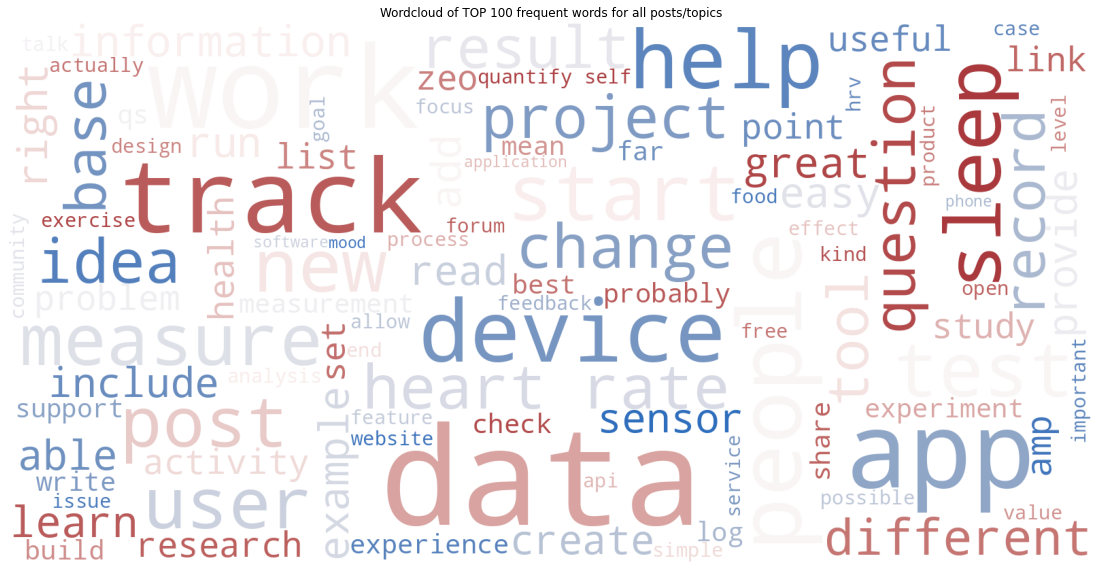

In [78]:
# using list comprehension 
listToStr= ' '.join(map(str, words)) 

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100, colormap='vlag',
                      background_color="white", collocations=True).generate(listToStr)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of TOP 100 frequent words for all posts/topics')
plt.axis("off")
plt.show()

### QS Image WordCloud

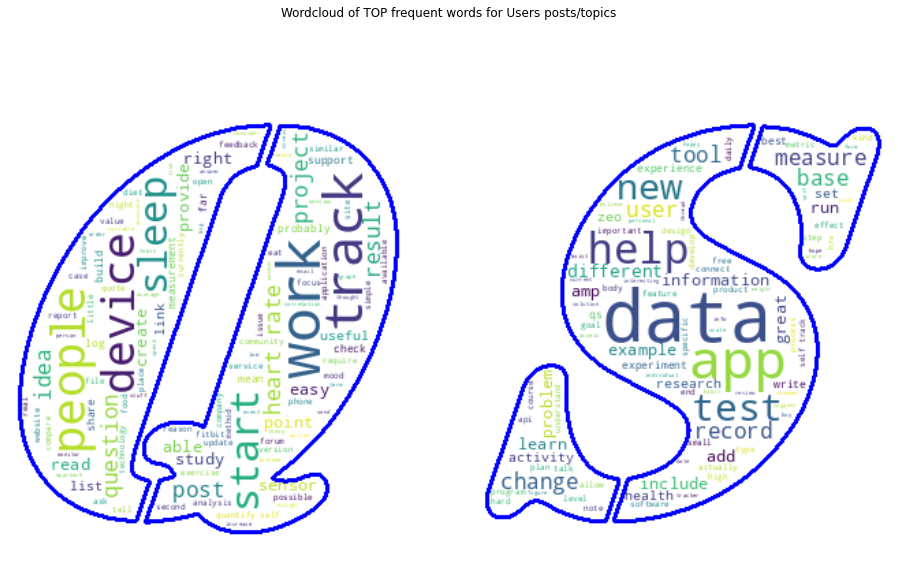

In [79]:
# using list comprehension 
QS_word = ' '.join(map(str, words))

# open the image and use np.array to transform the file to an array

cand_mask= np.array(Image.open('QS.png'))

# take all values greater than 3 and transfer 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask= np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='blue',
                      mask=cand_mask,
                      contour_width=2).generate(QS_word)


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of TOP frequent words for Users posts/topics')
plt.axis('off')
plt.show()

## 4 - Bigrams
- List most occured bigrams in the posts/topics to explore more in depth

Text(0.5, 1.0, 'TOP 20 pair words which occurred in the topics/posts')

<Figure size 1440x720 with 0 Axes>

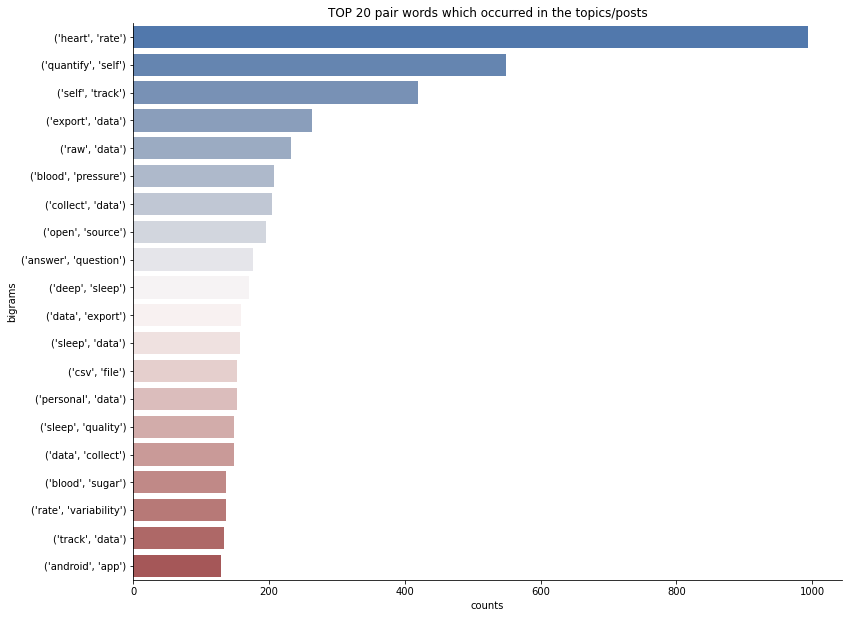

In [80]:
#top 20 bigrams 
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
bigrams_top = pd.DataFrame(bigrams_series.sort_values(ascending=False))
bigrams_top = bigrams_top.reset_index().rename(columns={'index': 'bigrams', 0:'counts'})
bigrams_top
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='bigrams', kind="bar", palette="vlag", data=bigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 pair words which occurred in the topics/posts')

In [81]:
def get_nouns_adjs(series):
    
    " Topic Modeling using only nouns and adjectives"
    
    pos_tags= nltk.pos_tag(series)
    all_adj_nouns= [word for (word, tag) in pos_tags if (tag=="NN" or tag=="NNS" or tag=="JJ")] 
    return all_adj_nouns

df_nouns_adj = df_clean.apply(get_nouns_adjs)

NameError: name 'df_clean' is not defined

Text(0.5, 1.0, 'TOP 20 three words which occurred together in the topics/posts')

<Figure size 1440x720 with 0 Axes>

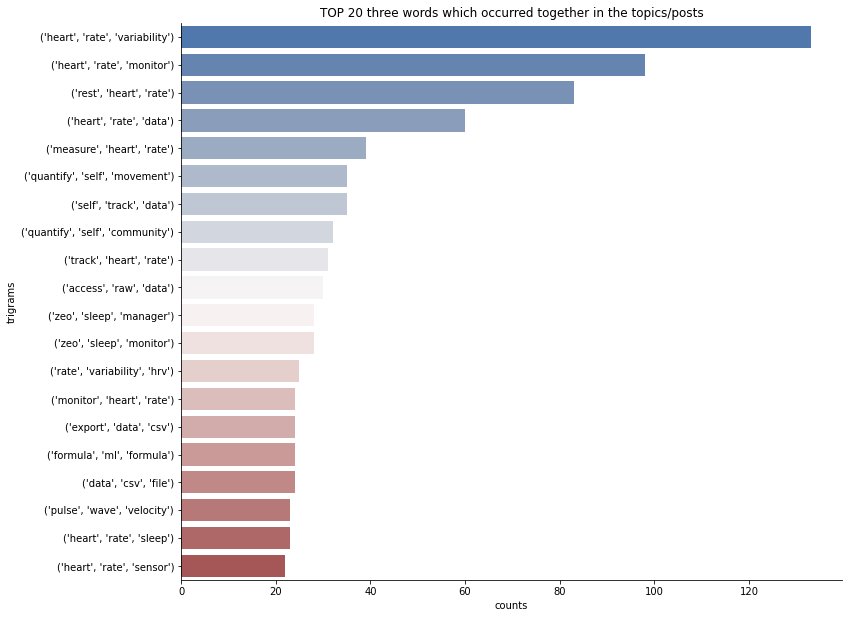

In [82]:
#top 20 trigrams 
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
trigrams_top = pd.DataFrame(trigrams_series.sort_values(ascending=False))
trigrams_top = trigrams_top.reset_index().rename(columns={'index': 'trigrams', 0:'counts'})
trigrams_top
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='trigrams', kind="bar", palette="vlag", data=trigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 three words which occurred together in the topics/posts')

Text(0.5, 1.0, 'TOP 20 three words which occurred together in the topics/posts')

<Figure size 1440x720 with 0 Axes>

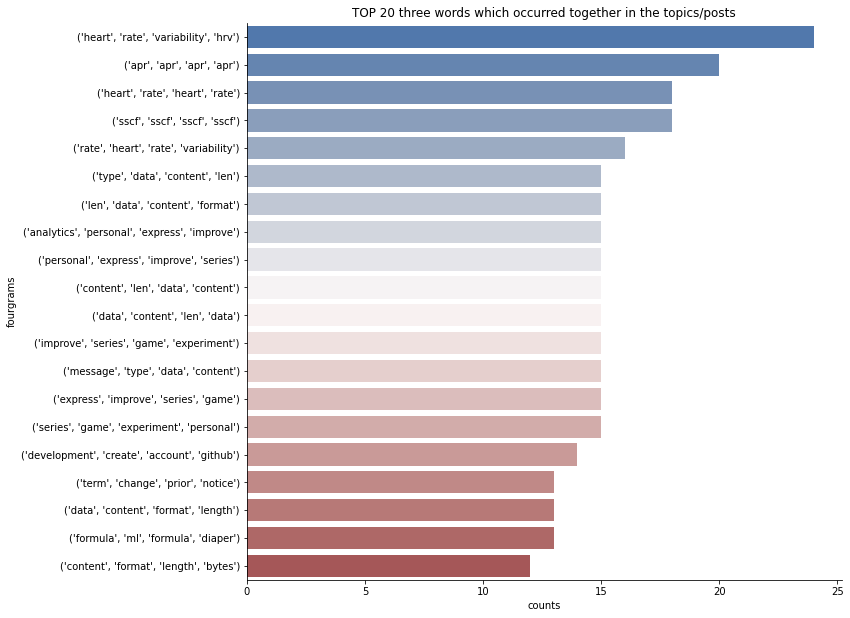

In [83]:
#top 20 trigrams 
fourgrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:20]
fourgrams_top = pd.DataFrame(fourgrams_series.sort_values(ascending=False))
fourgrams_top = fourgrams_top.reset_index().rename(columns={'index': 'fourgrams', 0:'counts'})
fourgrams_top
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='fourgrams', kind="bar", palette="vlag", data=fourgrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 three words which occurred together in the topics/posts')

### 4.1 Keyword Analysis: Lexical Dispersion Plot

In [84]:
test = global_df.copy()

In [85]:
# calculating the most frequent words' occurence in each thread 

test['data'] = test['lemmat_text'].str.count('data')
test['track'] = test['lemmat_text'].str.count('track')
test['sleep'] = test['lemmat_text'].str.count('sleep')
test['work'] = test['lemmat_text'].str.count('work')
test['app'] = test['lemmat_text'].str.count('app')
test['device'] = test['lemmat_text'].str.count('device')
test['self'] = test['lemmat_text'].str.count('self')
test['people'] = test['lemmat_text'].str.count('people')
test['help'] = test['lemmat_text'].str.count('help')
test['test'] = test['lemmat_text'].str.count('test')
test['start'] = test['lemmat_text'].str.count('start')
test['health'] = test['lemmat_text'].str.count('health')
test['measure'] = test['lemmat_text'].str.count('measure')
test['zeo'] = test['lemmat_text'].str.count('zeo')
test['post'] = test['lemmat_text'].str.count('post')
test['new'] = test['lemmat_text'].str.count('new')
test['question'] = test['lemmat_text'].str.count('question')
test['rate'] = test['lemmat_text'].str.count('rate')
test['user'] = test['lemmat_text'].str.count('user')
test['heart'] = test['lemmat_text'].str.count('heart')
test['change'] = test['lemmat_text'].str.count('change')
test['project'] = test['lemmat_text'].str.count('project')
test['sensor'] = test['lemmat_text'].str.count('sensor')
test['tool'] = test['lemmat_text'].str.count('tool')
test['different'] = test['lemmat_text'].str.count('different')
test['activity'] = test['lemmat_text'].str.count('activity')
test['idea'] = test['lemmat_text'].str.count('idea')
test['apps'] = test['lemmat_text'].str.count('apps')
test['record'] = test['lemmat_text'].str.count('record')
test['research'] = test['lemmat_text'].str.count('research')

In [86]:
words_df = test.groupby('creation_year')['data', 'track', 'sleep', 'work', 'app', 'device',
                             'self', 'people', 'help', 'test','start', 'health', 
                             'measure', 'zeo', 'post', 'new', 'question', 'rate',
                             'user', 'heart', 'change', 'project', 'sensor', 'tool', 'different',
                             'activity', 'idea', 'apps', 'record', 'research'].sum()
words_df

<ipython-input-86-271ac090cfdd>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



data  track  sleep  work   app  device  self  people  help  \
creation_year                                                               
2011            549    312    207   299   397      72   248     227   203   
2012            826    401    208   297   573     118   181     227   161   
2013           2072    680    792   829  1339     432   335     340   417   
2014           1597    837    736   749  1245     404   356     306   353   
2015            815    472    247   304   778     177   175     117   172   
2016           1080    470    566   360   821     253   133     161   170   
2017            426    427    340   223   487     122   121     112   122   
2018            426    282    203   202   395     121    78     102   111   
2019            729    449    226   290   587     111   169     129   178   
2020            909    570    195   356   636     127   257     140   154   
2021            293    178    165   153   161      41    58      45    56   

               test  ...  change  project  sensor  tool  different  activity  \
creation_year        ...                                                       
2011            170  ...     149       97      66    87         71        61   
2012            141  ...      96       96      32   118        117        89   
2013            216  ...     283      178     320   160        208       213   
2014            276  ...     170      197     324   222        171       208   
2015             79  ...     106       70      74    91         65        67   
2016            211  ...      96      101     148   135         97       112   
2017            162  ...      75       66      71    74         82        86   
2018            170  ...      55       61      22    53         73        50   
2019            142  ...      96      132      73    96         75        68   
2020            138  ...     143      155      61   105        125        90   
2021             36  ...      26       31      16    20         33        31   

               idea  apps  record  research  
creation_year                                
2011            103    48      81        94  
2012             90    84      52       103  
2013            243   163     205       187  
2014            229   194     160       200  
2015             82   125      74        93  
2016            104   123      97       125  
2017             78    72      71        70  
2018             64    44      60        55  
2019            105    63     118        61  
2020            116    83      98       113  
2021             30    13      40        38  

[11 rows x 30 columns]

In [87]:
words_df.columns[0:30]

Index(['data', 'track', 'sleep', 'work', 'app', 'device', 'self', 'people',
       'help', 'test', 'start', 'health', 'measure', 'zeo', 'post', 'new',
       'question', 'rate', 'user', 'heart', 'change', 'project', 'sensor',
       'tool', 'different', 'activity', 'idea', 'apps', 'record', 'research'],
      dtype='object')

<a id='freqword'></a>

## Most frequent words in QS over the years of 2011 to 2021

In [88]:
import plotly.graph_objs as go

fig = px.line(words_df, x=words_df.index, y=words_df.columns[0:30], title="Word Dispersion over time 2011 to 2021")

fig.show()

In [89]:
# calculating the most frequent words' occurence in each thread 

df_21['data'] = df_21['lemmat_text'].str.count('data')
df_21['track'] = df_21['lemmat_text'].str.count('track')
df_21['work'] = df_21['lemmat_text'].str.count('work')
df_21['sleep'] = df_21['lemmat_text'].str.count('sleep')
df_21['self'] = df_21['lemmat_text'].str.count('sel')
df_21['app'] = df_21['lemmat_text'].str.count('app')
df_21['measure'] = df_21['lemmat_text'].str.count('measure')
df_21['start'] = df_21['lemmat_text'].str.count('start')
df_21['effect'] = df_21['lemmat_text'].str.count('effect')
df_21['experiment'] = df_21['lemmat_text'].str.count('experiment')
df_21['project'] = df_21['lemmat_text'].str.count('project')
df_21['help'] = df_21['lemmat_text'].str.count('help')
df_21['people'] = df_21['lemmat_text'].str.count('people')
df_21['amp'] = df_21['lemmat_text'].str.count('amp')
df_21['hrv'] = df_21['lemmat_text'].str.count('hrv')
df_21['rate'] = df_21['lemmat_text'].str.count('rate')
df_21['health'] = df_21['lemmat_text'].str.count('health')
df_21['device'] = df_21['lemmat_text'].str.count('device')
df_21['change'] = df_21['lemmat_text'].str.count('change')
df_21['user'] = df_21['lemmat_text'].str.count('user')
df_21['test'] = df_21['lemmat_text'].str.count('test')
df_21['heart'] = df_21['lemmat_text'].str.count('heart')
df_21['different'] = df_21['lemmat_text'].str.count('different')
df_21['note'] = df_21['lemmat_text'].str.count('note')
df_21['post'] = df_21['lemmat_text'].str.count('post')
df_21['food'] = df_21['lemmat_text'].str.count('food')
df_21['learn'] = df_21['lemmat_text'].str.count('learn')
df_21['new'] = df_21['lemmat_text'].str.count('new')
df_21['result'] = df_21['lemmat_text'].str.count('result')
df_21['oura'] = df_21['lemmat_text'].str.count('oura')

<ipython-input-89-7562ef048686>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-7562ef048686>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-7562ef048686>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-7562ef0

In [90]:
words_df_21 = df_21.groupby('creation_date')['data', 'track', 'work', 'sleep', 'self', 'app',
                             'measure', 'start', 'effect', 'experiment','project', 'help', 
                             'people', 'amp', 'hrv', 'rate', 'health', 'device',
                             'change', 'user', 'test', 'heart', 'different', 'note', 'post',
                             'food', 'learn', 'new', 'result', 'oura'].sum()
words_df_21

<ipython-input-90-fc5903f2216c>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



data  track  work  sleep  self  app  measure  start  effect  \
creation_date                                                                
2020-01-01        1      1     0      0     0    2        0      0       0   
2020-01-02        1      4    10      0     7    1        0      3       0   
2020-01-03        0      0     0      0     0    0        0      0       0   
2020-01-05        1      2     4      0     0    2        0      0       0   
2020-01-09        0      0     0      0     0    1        2      1       0   
...             ...    ...   ...    ...   ...  ...      ...    ...     ...   
2021-04-02        1      0     0      0     0    0        0      0       0   
2021-04-03        7      1     1      1     0    3        0      0       0   
2021-04-04        0      0     0      0     0    0        0      0       0   
2021-04-05        0      0     0      0     0    0        0      0       0   
2021-04-06        0      1     1      0     0    0        0      0       0   

               experiment  ...  test  heart  different  note  post  food  \
creation_date              ...                                             
2020-01-01              0  ...     0      0          0     0     0     0   
2020-01-02              0  ...     0      1          0     2     0     0   
2020-01-03              0  ...     0      0          0     0     0     0   
2020-01-05              0  ...     0      0          0     1     0     0   
2020-01-09              0  ...     1      0          0     2     0     0   
...                   ...  ...   ...    ...        ...   ...   ...   ...   
2021-04-02              0  ...     0      0          0     0     0     0   
2021-04-03              1  ...     0      0          1     0     0     0   
2021-04-04              0  ...     1      0          0     0     0     0   
2021-04-05              0  ...     0      0          0     0     0     0   
2021-04-06              0  ...     0      0          0     0     0     0   

               learn  new  result  oura  
creation_date                            
2020-01-01         0    3       0     0  
2020-01-02         0    0       0     0  
2020-01-03         0    0       0     0  
2020-01-05         0    0       1     0  
2020-01-09         0    0       0     0  
...              ...  ...     ...   ...  
2021-04-02         0    0       0     0  
2021-04-03         0    0       0     0  
2021-04-04         0    0       0     0  
2021-04-05         0    0       0     0  
2021-04-06         0    1       0     0  

[361 rows x 30 columns]

## <a id='freqword_21'></a>

## Most frequent words in QS over the years of 2020 to 2021

In [ ]:
import plotly.graph_objs as go

fig = px.line(words_df_21, x= words_df_21.index, y= words_df_21.columns[0:30], title="Word Dispersion over time 2020 to 2021")

fig.show()

<a id='lda'></a>

## 1

In [ ]:
df = global_df.copy()

df['no_sw_LDA_text'] = df['no_sw_LDA_text'].astype('str')

## Merge the different  threads of the topic_id into one topic to have 2117 documents

In [ ]:
df = df.groupby(['topic_id'], as_index = False).agg({'no_sw_LDA_text': ' '.join})
df.head()

In [ ]:
df['token_NN_text'] = df.no_sw_LDA_text.apply(lambda x: tokenize_text(x))

# 5 - Topic Modelling

In [ ]:
dictionary = corpora.Dictionary(df.token_NN_text)

# filter words appear less than 15 docs & more than 0.5 documents & keep only 100k most frequent words
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# document to 'bow' BAG OF WORDS
corpus = [dictionary.doc2bow(doc) for doc in df.token_NN_text]

In [ ]:
len(corpus)

In [ ]:
len(dictionary)

In [ ]:
dictionary

In [ ]:
%%time
# Creating the object for LDA model using gensim library

LDA = gensim.models.ldamodel.LdaModel

# Build LDA model

lda_model = LDA(corpus= corpus, 
                id2word = dictionary, 
                num_topics = 30, 
                random_state = 50,
                update_every = 1,
                chunksize = 100,
                passes = 10,
                #alpha = "auto"
               )

# save model

lda_model.save('QS_topics_lda.model')

#  num_topics =10, random_state = 100, chunksize=1000, passes =50, iterations = 100)

### LDA

In [ ]:
from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, 
                                       id2word=dictionary, passes=2, workers=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

<a id='lda_tf'></a>

### TF-IDF

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10,
                                             id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

In [ ]:
for index, score in sorted(lda_model[corpus[1]], key=lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

### Performance evaluation

In [ ]:
for index, score in sorted(lda_model_tfidf[corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

### Testing Unseen docs

In [ ]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
unseen_document = lemma_sentence(unseen_document)
unseen_document = tokenize_text(unseen_document)
unseen_document

In [ ]:
lda_model

In [ ]:
bow_vector = dictionary.doc2bow(unseen_document)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

<a id='topic'></a>

# Topics model for the docs

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
pyLDAvis.save_html(vis_data, 'ldamodel.html')

### Vec LDA model

####  * data_vectorized

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(df.no_sw_LDA_text)

In [ ]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

In [ ]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

## LDA MODEL WITH SKLEARN

In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

In [ ]:
from pprint import pprint

from sklearn.model_selection import GridSearchCV

In [ ]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]


log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) 
                     for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]

log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) 
                     for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]

log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) 
                     for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]


# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [ ]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df.no_sw_LDA_text))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [ ]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution.sort_values(by='Topic Num')

<a id='coherent_model'></a>

# Coherent LDA model

In [ ]:
pyLDAvis.enable_notebook()

plot = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
plot

In [ ]:
pyLDAvis.save_html(plot, 'ldamodel_10.html')

In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

### Top 15 keywords in each topic

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-']
                                   else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [ ]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["sleep"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

<a id='cluster_topic'></a>

## Cluster documents with similair topics

In [ ]:
lda_output

In [ ]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

In [ ]:
df_topic_keywords.columns

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df_topic_keywords

pca = PCA(n_components = 2)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clustered_df['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show()

In [ ]:
import plotly.express as px

features = df_topic_keywords.columns

fig = px.scatter_matrix(
    df_topic_keywords,
    dimensions=features,
    color= df_topic_keywords.index
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.ylabel('Component 1')
plt.title("Segregation of Topic Clusters", )

#create a new figure
plt.figure(figsize=(5,5))

#loop through labels and plot each cluster
for i, label in enumerate(clusters):

    #add data points 
    plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=customPalette[i], 
                alpha=0.20)
    
    #add label
    plt.annotate(label, 
                 data.loc[data['label']==label,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=customPalette[i])

<a id='similar_topic'></a>

## similar documents by entering text + Create dashboard

In [ ]:
global_df.columns

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def similar_documents(text, doc_topic_probs, documents = global_df.cleaned_text, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

In [ ]:
# Get similar documents
mytext = ["Some text about science and health"]
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = global_df.cleaned_text, top_n=1, verbose=True)
print('\n', docs)

<a id='dominant_topic'></a>

# Dominant topic in each sentence

In [ ]:
def format_topics_sentences(ldamodel= lda_model, corpus= corpus, texts = data_vectorized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel= best_lda_model, corpus= corpus, texts= data_vectorized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

# Topic distribution across posts/topics 

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

In [ ]:
len(global_df)

## 2

<a id='ner'></a>

## Named Entity Recognition

In [ ]:
org_name = pd.read_csv('name_entity/org-name.csv')
product_name = pd.read_csv('name_entity/product-name-tsv.csv')
works = pd.read_csv('name_entity/work-of-art-tsv.csv', sep="\t")
person_name = pd.read_csv('name_entity/person.csv', sep="\t")
event_name = pd.read_csv('name_entity/event.csv', sep="\t")
loc1 = pd.read_csv('name_entity/loc1.csv', sep="\t")
loc2 = pd.read_csv('name_entity/location2.csv', sep="\t")

In [ ]:
org_name = org_name.dropna()
product_name = product_name.dropna()
works = works.dropna()
person_name = person_name.dropna()
event_name = event_name.dropna()
loc1 = loc1.dropna()
loc2 = loc2.dropna()

In [ ]:
print(len(loc1))
print(len(loc2))

In [ ]:
location = pd.concat([loc1, loc2], ignore_index=True)

In [ ]:
org_name['category'] = 'ORG'
product_name['category'] = 'PRODUCT'
works['category'] = 'WORKS'
person_name['category'] = 'PERSON'
event_name['category'] = 'EVENT'
location['category'] = 'LOCATION'

In [ ]:
org_name.sort_values(by="frequency", ascending= False)

In [ ]:
org_name = org_name.dropna()

In [ ]:
org_name.entity.items

In [ ]:
import plotly.graph_objs as go

In [ ]:
data = dict(org_name)

In [ ]:
# function to vizualise data on wordcloud

def str_list(mylist):
    mylist = mylist.tolist()
    mylist = str(mylist)
    mylist = tokenize_text(mylist)
    mylist = ' '.join(map(str, mylist))
    return mylist

In [ ]:
org_list = str_list(org_name.entity)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800, max_font_size=150, max_words=100, colormap='Set1', background_color="white", collocations=True).generate(org_list)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of products talked about')
plt.axis("off")
plt.show()

In [ ]:
# Create and generate a word cloud image:
product = str_list(event_name.entity)
wordcloud = WordCloud(width=1600, height=800, max_font_size=150, max_words=100, colormap='Set1', collocations=True, background_color="white").generate(product)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of events talked about')
plt.axis("off")
plt.show()

In [ ]:
# Create and generate a word cloud image:
product = str_list(product_name.entity)
wordcloud = WordCloud(width=1600, height=800, max_font_size=150, max_words=100, colormap='Set1', collocations=True, background_color="white").generate(product)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of Works talked about')
plt.axis("off")
plt.show()

In [ ]:
fig = px.scatter(org_name, x='frequency', y='entity', text='entity', size='frequency', color='frequency', size_max=45
                 , template='plotly_white', title='Bigram similarity and frequency', labels={'words': 'Avg. Length<BR>(words)'}
                 , color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

In [ ]:
future enhancements:
    
    - information extraction
    - information retrieval
    - Text summarization
    - question answering 
    - 